# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot. The data can be found [here](https://drive.google.com/file/d/1tgx8nnEXLcqy1ds_99T_14-2B9TM-Gne/view?usp=sharing), please downloand and place them in your local data folder from which you can read them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data

data=pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

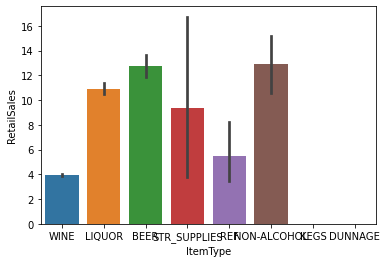

In [3]:
ax=sns.barplot(x="ItemType",y="RetailSales", data=data)
#Francesca self note : 어떤식으로 해석하면 되는건가요? 
#paolo: not exactly the requested plot, check solutions and/or ask me

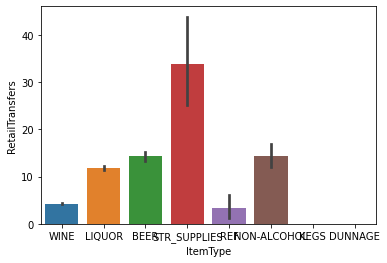

In [4]:
ax=sns.barplot(x="ItemType", y="RetailTransfers", data=data)

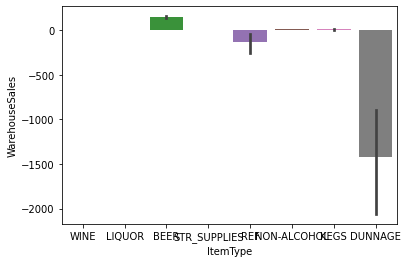

In [5]:
ax=sns.barplot(x="ItemType", y="WarehouseSales", data=data)

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

<BarContainer object of 10 artists>

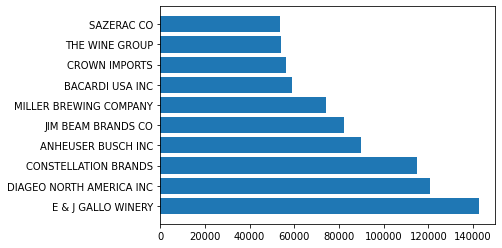

In [6]:
data['SalesMix'] = data['RetailSales']+data['RetailTransfers'] 
group_by_supplier=data.groupby('Supplier')['SalesMix'].sum()
indexs = group_by_supplier.sort_values(ascending=False)[:10].index.tolist()
values = group_by_supplier.sort_values(ascending=False)[:10].values.tolist()
plt.barh(indexs, values)
#paolo: check solution for alternative

## 3. Create a bar-chart chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

<AxesSubplot:xlabel='Month'>

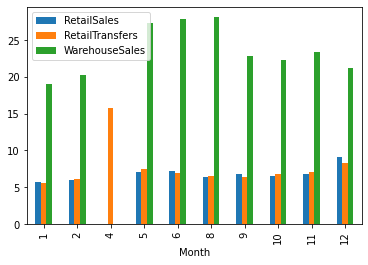

In [7]:
data[['RetailSales', 'RetailTransfers', 'WarehouseSales', 'Month']].groupby('Month').mean().plot.bar()
#paolo: nice one but could you show the year also?

## 4. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

<AxesSubplot:xlabel='DateIndex', ylabel='RetailSales'>

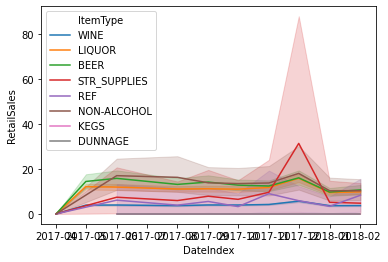

In [8]:
data['Year'] = data['Year'].astype(str)
data['Month'] = data['Month'].astype(str)
data['DateIndex'] = data['Year'] + "-" + data['Month']
data['DateIndex'] = pd.to_datetime(data['DateIndex'], format='%Y-%m')
sns.lineplot(data=data, x='DateIndex', y='RetailSales', hue='ItemType')
#paolo: you should aggregate the sales- check solutions
#paolo: check x-label is not easy to read it there is overalap. Try to rotate teh label

## 6. Plot the same information as above (i.e. Q5) but as a bar chart.

In [ ]:
#paolo: what about this one? It refers to previous question

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

<AxesSubplot:xlabel='RetailSales', ylabel='RetailTransfers'>

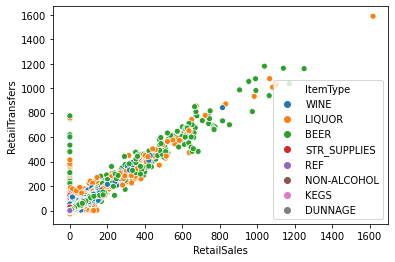

In [9]:
sns.scatterplot(data=data, x="RetailSales", y="RetailTransfers", hue="ItemType")

In [ ]:
#paolo: yes- good one!

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [14]:
data = data.select_dtypes(include=['int64', 'float'])

In [15]:
corr_mat = data.corr()
#paolo: here the question it is not about correlations
# but about a scatter plot

In [16]:
corr_mat.head()

,RetailSales,RetailTransfers,WarehouseSales,SalesMix
RetailSales,1.000000,0.943769,0.459783,0.985009
RetailTransfers,0.943769,1.000000,0.438406,0.986652
WarehouseSales,0.459783,0.438406,1.000000,0.455226
SalesMix,0.985009,0.986652,0.455226,1.000000


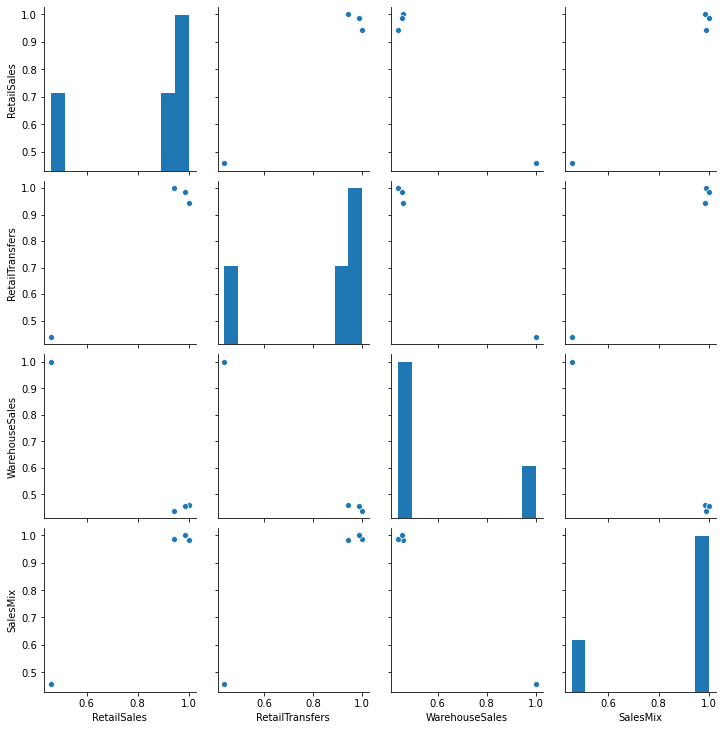

In [13]:
sns.pairplot(corr_mat)

In [ ]:
#paolo: good start-some more work is needed-check comments
# and ask me if you have questions